#Um panorama geral sobre a COVID-19 no mundo

In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

# Leitura dos DataFrames

In [ ]:
#url = '/content/drive/MyDrive/Datasets/country_vaccinations.csv'
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url,sep=',')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
url2 = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
w_df = pd.read_csv(url2,sep=',')
w_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


#Agrupando por País

In [ ]:
df.groupby("location").mean()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.268077e+04,144.071979,145.810247,1329.182320,6.801105,6.401031,839.511031,3.700979,3.745615,34.144354,0.174704,0.164414,0.999322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000e+03,4.100000e+03,NaN,NaN,1.367000e+03,0.010000,0.010000,NaN,35.000000,41.886694,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
Africa,1.427691e+06,10188.890000,10267.037360,37508.047872,272.330000,274.337208,1064.965877,7.600287,7.658510,27.978582,0.203155,0.204642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.542239e+06,1.921103e+06,5.306047e+05,1.353434e+05,1.041945e+05,0.189667,0.142667,0.038571,77.632353,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.795512e+04,318.741333,318.653662,555.951743,5.646113,5.569551,9714.060285,110.758669,110.728214,193.186359,1.961812,1.935343,1.081755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299.587467,123441.091384,42.894251,0.451587,1285.502632,0.446674,0.194439,6.930081,6.079739e+03,9.063125e+02,4.632000e+02,2.633636e+02,4.642333e+02,0.211739,0.031250,0.016000,161.266667,63.776606,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
Algeria,4.885318e+04,298.561856,301.339415,1618.892473,8.201613,7.939204,1114.071165,6.808541,6.871896,36.917984,0.186981,0.181034,1.045596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.501000e+04,NaN,NaN,3.000000e+01,3.289048e+03,0.056667,NaN,NaN,74.666667,70.989091,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
Andorra,3.810764e+03,29.824607,29.954188,64.364641,0.312155,0.299021,49320.706592,386.004076,387.680687,833.037428,4.039981,3.869576,0.948472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134913.857143,1746.118643,NaN,539.208333,6.978653,0.086111,12.138889,2.234111e+03,1.893125e+03,1.218000e+03,NaN,7.629545e+01,2.891111,2.450000,1.580000,987.409091,47.756385,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,8.898599e+02,6.104513,6.147356,32.913420,0.151515,0.084139,9.141910,0.062705,0.063127,0.338502,0.001558,0.000851,0.801139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5753.293103,464051.773810,4.767464,0.059069,7015.191489,0.072028,0.001489,4957.933065,9.874417e+03,9.874417e+03,NaN,2.504182e+03,1.621636e+03,0.010000,0.010000,NaN,16.727273,61.211695,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
World,3.727848e+07,286645.305687,287302.115394,949590.860190,6376.819905

## Média de Novos Casos Diários

In [248]:
media_casos_diarios = df.groupby("location").mean().new_cases.dropna().sort_values(ascending=False)

In [249]:
media_casos_diarios.drop(["World","Asia","Europe","North America","Africa","South America","European Union",],inplace=True)

In [ ]:
maiores_media_casos = pd.DataFrame(media_casos_diarios.head(8))

In [ ]:
maiores_media_casos.reset_index(inplace=True)

In [ ]:
maiores_media_casos.columns = ["location","media_casos"]

In [ ]:
maiores_media_casos

,location,media_casos
0,United States,70468.655582
1,Brazil,30441.395349
2,India,27812.393720
3,Russia,10602.072639
4,United Kingdom,10397.888620
5,Africa,10188.890000
6,France,10099.935714
7,Italy,8006.564165


In [ ]:
import matplotlib as mpl

In [ ]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Blues")

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

In [ ]:
sns.color_palette()

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

Text(0.5, 1.0, 'Média de Casos Diários por País (Top 8)')

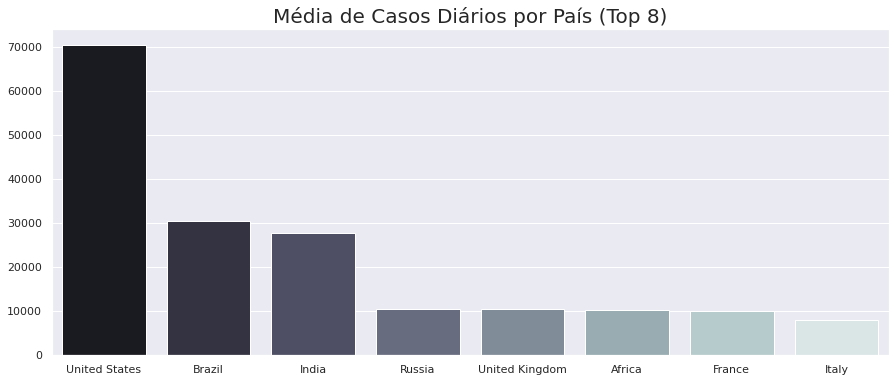

In [266]:
sns.set(rc={'figure.figsize':(15,6)})
#mpl.style.use("default")

ax = sns.barplot(x="location", y="media_casos", data=maiores_media_casos,palette="bone")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Média de Casos Diários por País (Top 8)',fontsize=20)

## Média de Mortes por Dia

In [ ]:
df.groupby("location").mean()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.268077e+04,144.071979,145.810247,1329.182320,6.801105,6.401031,839.511031,3.700979,3.745615,34.144354,0.174704,0.164414,0.999322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000e+03,4.100000e+03,NaN,NaN,1.367000e+03,0.010000,0.010000,NaN,35.000000,41.886694,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
Africa,1.427691e+06,10188.890000,10267.037360,37508.047872,272.330000,274.337208,1064.965877,7.600287,7.658510,27.978582,0.203155,0.204642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.542239e+06,1.921103e+06,5.306047e+05,1.353434e+05,1.041945e+05,0.189667,0.142667,0.038571,77.632353,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.795512e+04,318.741333,318.653662,555.951743,5.646113,5.569551,9714.060285,110.758669,110.728214,193.186359,1.961812,1.935343,1.081755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299.587467,123441.091384,42.894251,0.451587,1285.502632,0.446674,0.194439,6.930081,6.079739e+03,9.063125e+02,4.632000e+02,2.633636e+02,4.642333e+02,0.211739,0.031250,0.016000,161.266667,63.776606,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
Algeria,4.885318e+04,298.561856,301.339415,1618.892473,8.201613,7.939204,1114.071165,6.808541,6.871896,36.917984,0.186981,0.181034,1.045596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.501000e+04,NaN,NaN,3.000000e+01,3.289048e+03,0.056667,NaN,NaN,74.666667,70.989091,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
Andorra,3.810764e+03,29.824607,29.954188,64.364641,0.312155,0.299021,49320.706592,386.004076,387.680687,833.037428,4.039981,3.869576,0.948472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134913.857143,1746.118643,NaN,539.208333,6.978653,0.086111,12.138889,2.234111e+03,1.893125e+03,1.218000e+03,NaN,7.629545e+01,2.891111,2.450000,1.580000,987.409091,47.756385,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,8.898599e+02,6.104513,6.147356,32.913420,0.151515,0.084139,9.141910,0.062705,0.063127,0.338502,0.001558,0.000851,0.801139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5753.293103,464051.773810,4.767464,0.059069,7015.191489,0.072028,0.001489,4957.933065,9.874417e+03,9.874417e+03,NaN,2.504182e+03,1.621636e+03,0.010000,0.010000,NaN,16.727273,61.211695,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
World,3.727848e+07,286645.305687,287302.115394,949590.860190,6376.819905

In [268]:
media_mortes = df.groupby("location").mean().new_deaths.dropna().sort_values(ascending=False)
media_mortes.drop(["World","Asia","Europe","North America","South America","European Union","Africa"],inplace=True)

In [269]:
media_mortes = pd.DataFrame(media_mortes.head(8))

In [270]:
media_mortes.reset_index(inplace=True)
media_mortes.columns = ["location","media_mortes"]
media_mortes

,location,media_mortes
0,United States,1405.463542
1,Brazil,783.376022
2,Mexico,538.646575
3,India,427.265416
4,United Kingdom,333.764550
5,Italy,264.936224
6,Russia,252.783562
7,France,230.736181


Text(0.5, 1.0, 'Média de Mortes Diárias por País (Top 8)')

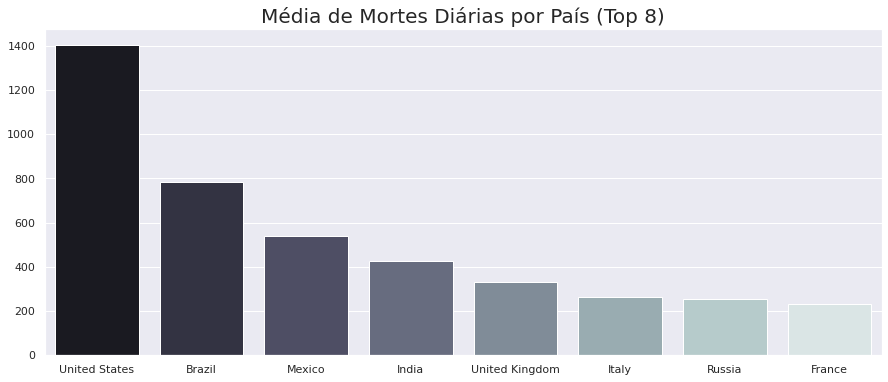

In [271]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="location", y="media_mortes", data=media_mortes,palette="bone")
ax.set_xlabel('')
ax.set_ylabel("")
ax.set_title('Média de Mortes Diárias por País (Top 8)',fontsize=20)

## Número de Mortes Totais

In [272]:
total_mortes = df.groupby("location").sum().new_deaths.dropna().sort_values(ascending=False)
total_mortes.drop(["World","Asia","Europe","North America","South America","European Union","Africa"],inplace=True)

In [274]:
total_mortes = pd.DataFrame(total_mortes.head(8))
total_mortes.reset_index(inplace=True)
total_mortes.columns = ["location","total_mortes"]
total_mortes

,location,total_mortes
0,United States,539698.0
1,Brazil,287499.0
2,Mexico,196606.0
3,India,159370.0
4,United Kingdom,126163.0
5,Italy,103855.0
6,Russia,92266.0
7,France,91833.0


Text(0.5, 1.0, 'Quantidade Total de Mortes por País (Top 8)')

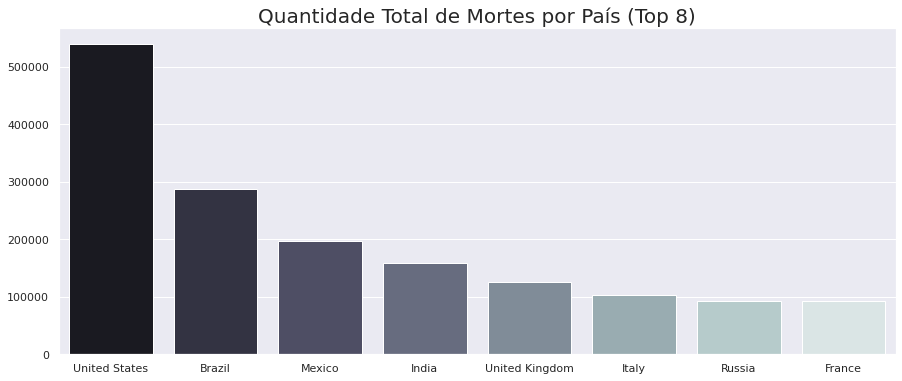

In [275]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="location", y="total_mortes", data=total_mortes,palette="bone")
ax.set_xlabel('')
ax.set_ylabel("")
ax.set_title('Quantidade Total de Mortes por País (Top 8)',fontsize=20)

## Número de Casos Totais

In [ ]:
df.groupby("location").sum().head(3)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12712820.0,56044.0,55991.135,481164.0,2462.0,2457.996,326569.791,1439.681,1438.316,12360.256,63.243,63.135,353.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,8200.0,8200.0,0.0,0.0,8202.0,0.02,0.02,0.00,210.0,15581.85,1.514312e+10,21170.158,7235.4,1004.009,520.093,701750.943,0.0,232244.281,3730.51,0.0,0.0,14683.194,194.50,25218.87,198.779
Africa,569648809.0,4075556.0,4045212.720,14103026.0,108932.0,108088.860,424921.385,3040.115,3017.453,10519.947,81.262,80.629,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,152534364.0,115266170.0,22285397.0,7173202.0,7085223.0,11.38,8.56,1.62,5279.0,0.00,5.362392e+11,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000
Albania,10483171.0,119528.0,117901.855,207370.0,2106.0,2060.734,3642772.607,41534.501,40969.439,72058.512,731.756,716.077,388.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497742.0,47277938.0,16428.498,172.958,488491.0,169.736,71.748,2557.2,139834.0,14501.0,2316.0,2897.0,27854.0,4.87,0.50,0.08,9676.0,24617.77,1.116586e+09,40689.948,14744.0,5116.944,3353.484,4579731.228,426.8,118027.660,3911.04,2754.8,19865.6,0.000,1121.32,30485.16,308.460


In [240]:
total_casos = df.groupby("location").sum().new_cases.dropna().sort_values(ascending=False)
total_casos.drop(["World","Asia","Europe","North America","South America","European Union","Africa"],inplace=True)
total_casos = pd.DataFrame(total_casos.head(8))
total_casos.reset_index(inplace=True)
total_casos.columns = ["location","total_casos"]
total_casos

,location,total_casos
0,United States,29667304.0
1,Brazil,11780820.0
2,India,11514331.0
3,Russia,4378656.0
4,United Kingdom,4294328.0
5,France,4241973.0
6,Italy,3306711.0
7,Spain,3212332.0


Text(0.5, 1.0, 'Quantidade Total de Casos por País')

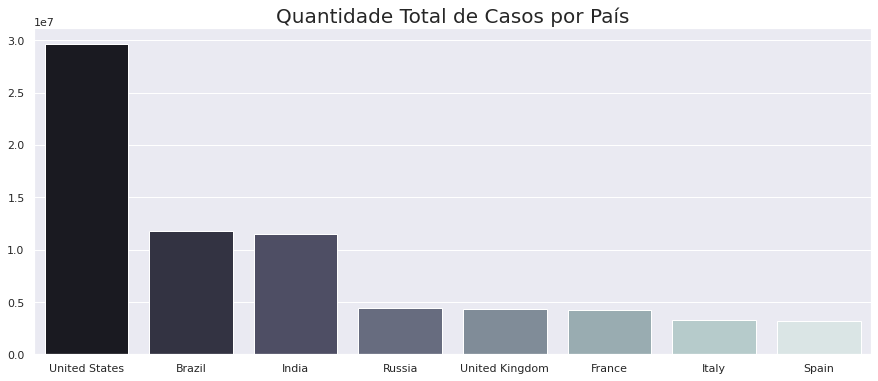

In [246]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="location", y="total_casos", data=total_casos,palette="bone")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Quantidade Total de Casos por País',fontsize=20)

## Letalidade

In [297]:
letal = df[['location','date','new_cases','new_deaths']]
letal = letal.groupby("location").sum()
letal['lethality'] = (letal.new_deaths/letal.new_cases)*100
letal.drop(["World","Asia","Europe","North America","South America","European Union","Africa"],inplace=True)
print(letal.lethality.mean())

1.977813825907668


In [301]:
letal.query("location == 'Brazil'")

,new_cases,new_deaths,lethality
location,,,
Brazil,11780820.0,287499.0,2.440399


In [303]:
letal = letal.dropna().sort_values(ascending=False,by="lethality").head(8).reset_index()
letal

,index,location,new_cases,new_deaths,lethality
0,0,Yemen,3126.0,723.0,23.128599
1,1,Mexico,2182188.0,196606.0,9.009581
2,2,Syria,16925.0,1130.0,6.676514
3,3,Sudan,30989.0,1959.0,6.321598
4,4,Egypt,193482.0,11472.0,5.929234
5,5,Ecuador,307429.0,16333.0,5.312771
6,6,China,100933.0,4822.0,4.777427
7,7,Bolivia,262941.0,12028.0,4.574410


Text(0.5, 1.0, 'Países com Maior Taxa de Letalidade')

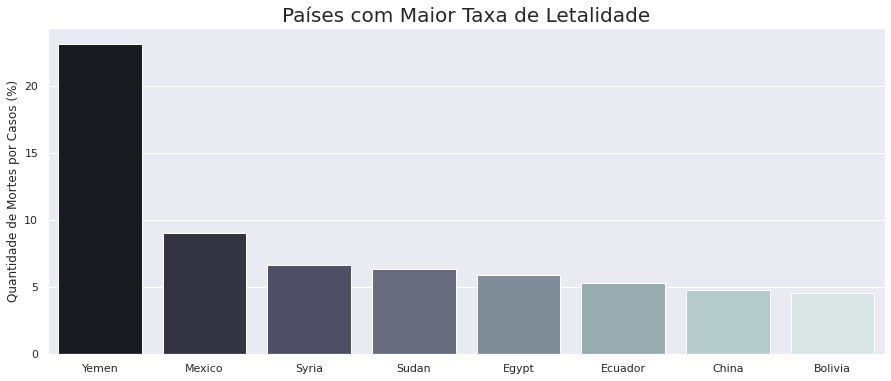

In [293]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="location", y="lethality", data=letal,palette="bone")
ax.set_xlabel('')
ax.set_ylabel('Quantidade de Mortes por Casos (%)')
ax.set_title('Países com Maior Taxa de Letalidade',fontsize=20)

## Rate de Reprodução (*reproduction_rate*)

In [ ]:
#taxa_reproducao
taxa_reproducao = df
taxa_reproducao.date = pd.to_datetime(taxa_reproducao.date)
taxa_reproducao.reproduction_rate = pd.to_numeric(taxa_reproducao.reproduction_rate)

### Brazil

In [ ]:
bra_rep_rate = taxa_reproducao.query("location == 'Brazil'")[["date","reproduction_rate"]]
bra_rep_rate.dropna(inplace=True)

In [ ]:
maior_taxa_br = bra_rep_rate.set_index("date").idxmax(),bra_rep_rate.set_index("date").max()
menor_taxa_br = bra_rep_rate.set_index("date").idxmin(),bra_rep_rate.set_index("date").min()

In [ ]:
maior_taxa_br

(reproduction_rate   2020-03-19
 dtype: datetime64[ns], reproduction_rate    2.38
 dtype: float64)

In [ ]:
menor_taxa_br

(reproduction_rate   2020-09-06
 dtype: datetime64[ns], reproduction_rate    0.93
 dtype: float64)

In [312]:
bra_rep_rate.shape
bra_rep_rate.query("date == '2021-03-17'")

,date,reproduction_rate
10119,2021-03-17,1.1


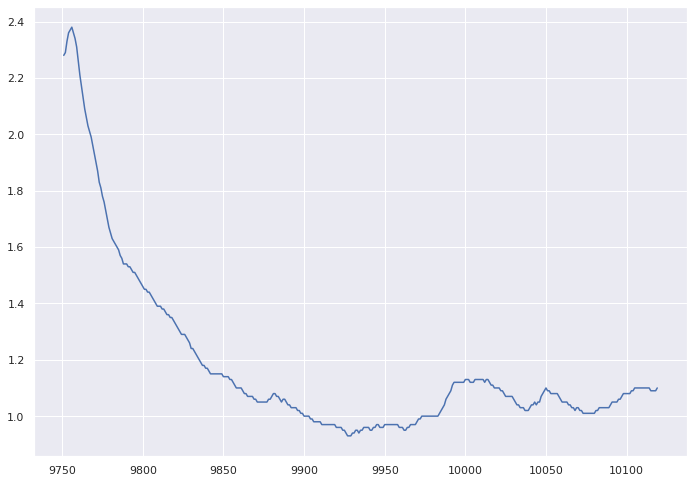

In [ ]:
plt.plot(bra_rep_rate.reproduction_rate)

### USA

In [ ]:
usa_rep_rate = taxa_reproducao.query("location == 'United States'")[["date","reproduction_rate"]]
usa_rep_rate.dropna(inplace=True)
maior_taxa_usa = usa_rep_rate.set_index("date").idxmax(),usa_rep_rate.set_index("date").max()
menor_taxa_usa = usa_rep_rate.set_index("date").idxmin(),usa_rep_rate.set_index("date").min()
print(maior_taxa_usa, menor_taxa_usa)

(reproduction_rate   2020-03-05
dtype: datetime64[ns], reproduction_rate    3.72
dtype: float64) (reproduction_rate   2021-02-15
dtype: datetime64[ns], reproduction_rate    0.73
dtype: float64)


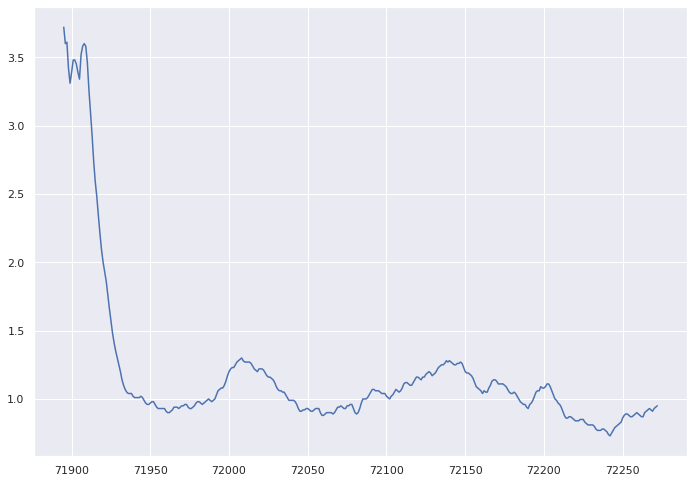

In [ ]:
plt.plot(usa_rep_rate.reproduction_rate)

###India

In [ ]:
ind_rep_rate = taxa_reproducao.query("location == 'India'")[["date","reproduction_rate"]]
ind_rep_rate.dropna(inplace=True)
maior_taxa = ind_rep_rate.set_index("date").idxmax(),ind_rep_rate.set_index("date").max()
menor_taxa = ind_rep_rate.set_index("date").idxmin(),ind_rep_rate.set_index("date").min()
print(maior_taxa, menor_taxa)

(reproduction_rate   2020-04-01
dtype: datetime64[ns], reproduction_rate    2.12
dtype: float64) (reproduction_rate   2020-12-14
dtype: datetime64[ns], reproduction_rate    0.86
dtype: float64)


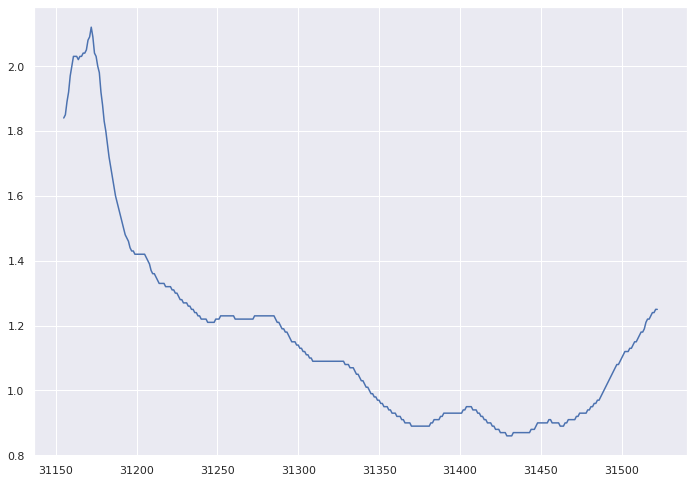

In [ ]:
plt.plot(ind_rep_rate.reproduction_rate)

### Russia

In [ ]:
rus_rep_rate = taxa_reproducao.query("location == 'Russia'")[["date","reproduction_rate"]]
rus_rep_rate.dropna(inplace=True)
maior_taxa = rus_rep_rate.set_index("date").idxmax(),rus_rep_rate.set_index("date").max()
menor_taxa = rus_rep_rate.set_index("date").idxmin(),rus_rep_rate.set_index("date").min()
print(maior_taxa, menor_taxa)

(reproduction_rate   2020-03-26
dtype: datetime64[ns], reproduction_rate    2.54
dtype: float64) (reproduction_rate   2021-02-03
dtype: datetime64[ns], reproduction_rate    0.88
dtype: float64)


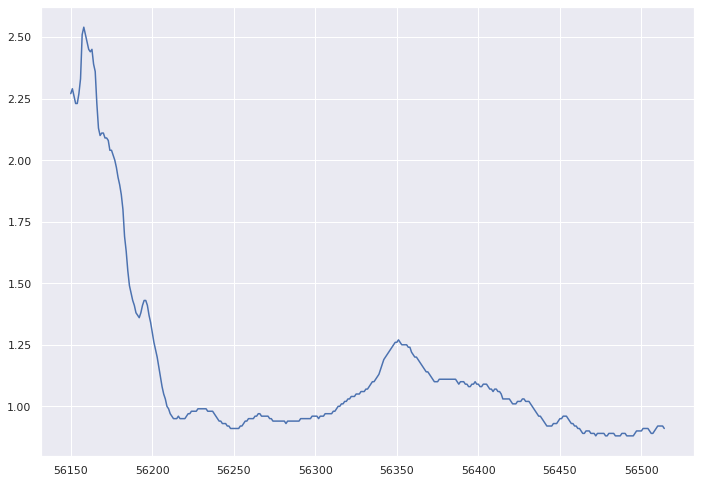

In [ ]:
plt.plot(rus_rep_rate.reproduction_rate)

### Reino Unido

In [ ]:
uk_rep_rate = taxa_reproducao.query("location == 'United Kingdom'")[["date","reproduction_rate"]]
uk_rep_rate.dropna(inplace=True)
maior_taxa = uk_rep_rate.set_index("date").idxmax(),uk_rep_rate.set_index("date").max()
menor_taxa = uk_rep_rate.set_index("date").idxmin(),uk_rep_rate.set_index("date").min()
print(maior_taxa, menor_taxa)

(reproduction_rate   2020-03-11
dtype: datetime64[ns], reproduction_rate    4.34
dtype: float64) (reproduction_rate   2020-07-01
dtype: datetime64[ns], reproduction_rate    0.23
dtype: float64)


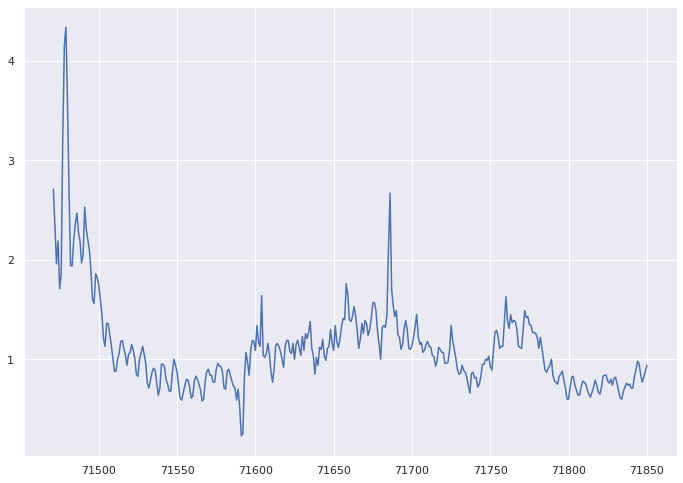

In [ ]:
plt.plot(uk_rep_rate.reproduction_rate)

## França

In [ ]:
fra_rep_rate = taxa_reproducao.query("location == 'France'")[["date","reproduction_rate"]]
fra_rep_rate.dropna(inplace=True)
maior_taxa = fra_rep_rate.set_index("date").idxmax(),fra_rep_rate.set_index("date").max()
menor_taxa = fra_rep_rate.set_index("date").idxmin(),fra_rep_rate.set_index("date").min()
print(maior_taxa, menor_taxa)

(reproduction_rate   2020-03-05
dtype: datetime64[ns], reproduction_rate    2.81
dtype: float64) (reproduction_rate   2020-05-02
dtype: datetime64[ns], reproduction_rate    0.66
dtype: float64)


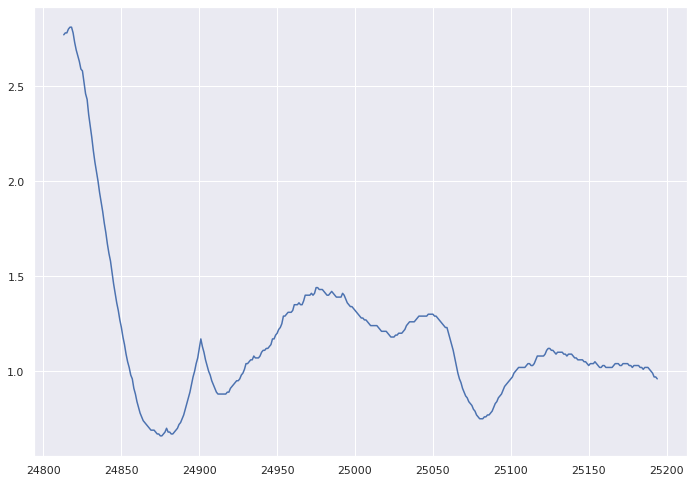

In [ ]:
plt.plot(fra_rep_rate.reproduction_rate)

Plotar os gráficos juntos em um subplot de 6 visualizações

##Plots

Text(0.5, 1.0, 'Reino Unido')

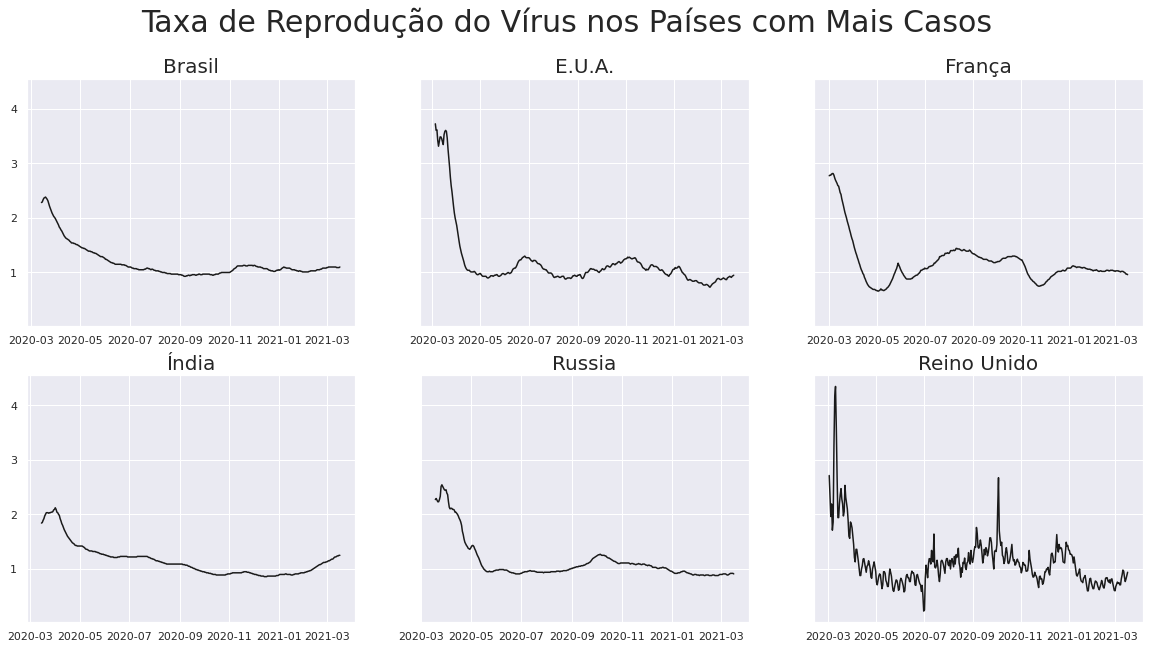

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True)

fig.set_size_inches((20,10))
fig.suptitle('Taxa de Reprodução do Vírus nos Países com Mais Casos',fontsize=30)

axs[0,0].plot(bra_rep_rate.date,bra_rep_rate.reproduction_rate,'k')
axs[0,1].plot(usa_rep_rate.date,usa_rep_rate.reproduction_rate,'k')
axs[0,2].plot(fra_rep_rate.date,fra_rep_rate.reproduction_rate,'k')

axs[1,0].plot(ind_rep_rate.date,ind_rep_rate.reproduction_rate,'k')
axs[1,1].plot(rus_rep_rate.date,rus_rep_rate.reproduction_rate,'k')
axs[1,2].plot(uk_rep_rate.date,uk_rep_rate.reproduction_rate,'k')

axs[0, 0].set_title('Brasil',{'fontsize': 20})
axs[0, 1].set_title('E.U.A.',{'fontsize': 20})
axs[0, 2].set_title('França',{'fontsize': 20})
axs[1, 0].set_title('Índia',{'fontsize': 20})
axs[1, 1].set_title('Russia',{'fontsize': 20})
axs[1, 2].set_title('Reino Unido',{'fontsize': 20})


# Modelo de Vacinação Brasil

## Modelo Brasil

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.shape

(75807, 59)

In [ ]:
data = df.drop(df[df.total_vaccinations.isna()].index)

In [ ]:
checked_data = data[["location","date","total_cases","total_deaths","total_vaccinations","people_vaccinated"]]

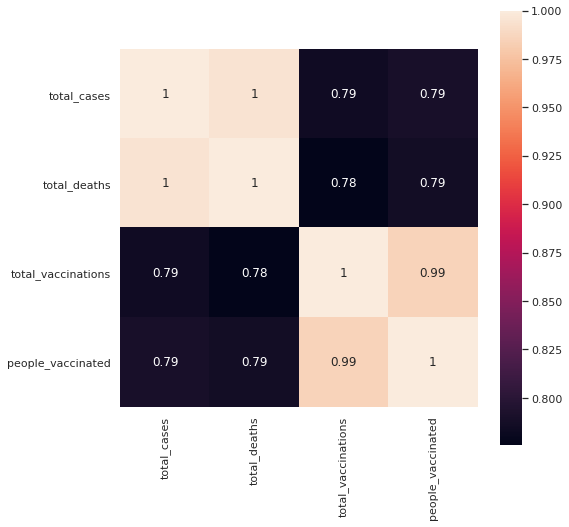

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(checked_data.corr(), annot=True, square=True)
plt.show()

In [ ]:
br_vac = checked_data.query("location=='Brazil'")

In [ ]:
br_vac.set_index("date",inplace=True)

In [ ]:
br_vac.drop(axis=1,labels="location",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
br_vac.head()

,total_cases,total_deaths,total_vaccinations,people_vaccinated
date,,,,
2021-01-16,8455059.0,209296.0,0.0,0.0
2021-01-17,8488099.0,209847.0,112.0,112.0
2021-01-18,8511770.0,210299.0,1109.0,1109.0
2021-01-19,8573864.0,211491.0,11470.0,11470.0
2021-01-20,8638249.0,212831.0,28543.0,28543.0


Conferindo se a série é temporal. Para isto, utiliza-se o teste Dickey-Fuller. Iremos utilizar o teste de Dickey-Fuller aumentado.

In [ ]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(br_vac.people_vaccinated)[1]))

p-value : 0.9981178995100253


P-Valor muito alto. Não podemos descartar a hipótese que a série é estacionária. 

In [ ]:
temp = br_vac.drop(axis=1,labels=['total_cases','total_deaths','total_vaccinations'])
temp.head(2)

,people_vaccinated
date,
2021-01-16,0.0
2021-01-17,112.0


In [ ]:
resultado_br_vac = seasonal_decompose(x=temp,period=14)

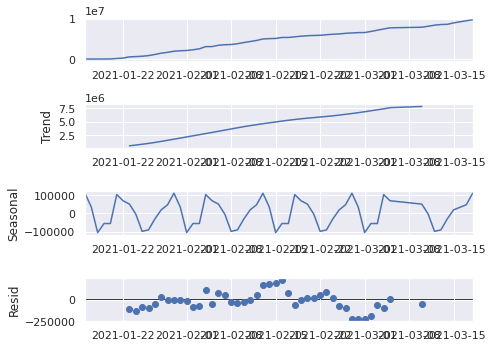

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
resultado_br_vac.plot();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Verificando parâmetros de autocorrelação, pois a série aparenta ser estacionária

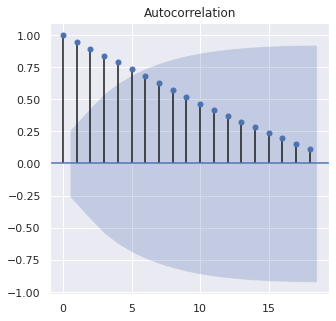

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plot_acf(temp);

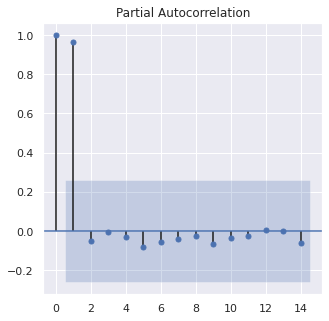

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
plot_pacf(temp,lags=14);

## Estimando modelo do Brasil

Utilizando modelo de autoregressão para validarmos 

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
lista = np.linspace(1,14,14)

In [ ]:
lista

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [ ]:
modelo_ajustado = AutoReg(temp,lags=lista,trend='c',seasonal=False,period=14).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [ ]:
modelo_previsto = modelo_ajustado.predict(start=56,end=56+(365*3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [323]:
for i in range(56,56+(365*3)):
  if modelo_previsto[i] > 211000000:
    print(i)
    break

299


In [ ]:
modelo_previsto = modelo_ajustado.predict(start=56,end=56+(350))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [ ]:
last_day = temp.index.max()
last_day = last_day.to_pydatetime()
new_index = []

In [ ]:
from datetime import timedelta, date
import datetime

In [ ]:
last_day = date.today()
end_date = last_day + datetime.timedelta(days=i)
print("Dia em que todos os brasileiros estariam vacinados: {}/{}/{}".format(end_date.day,end_date.month,end_date.year))

Dia em que todos os brasileiros estariam vacinados: 12/1/2022


In [ ]:
for i in range(1,352):
  new_index.append(last_day + datetime.timedelta(days=i))

In [ ]:
temp.columns

Index(['people_vaccinated'], dtype='object')

Text(0, 0.5, 'Quantidade de Pessoas (em Milhões)')

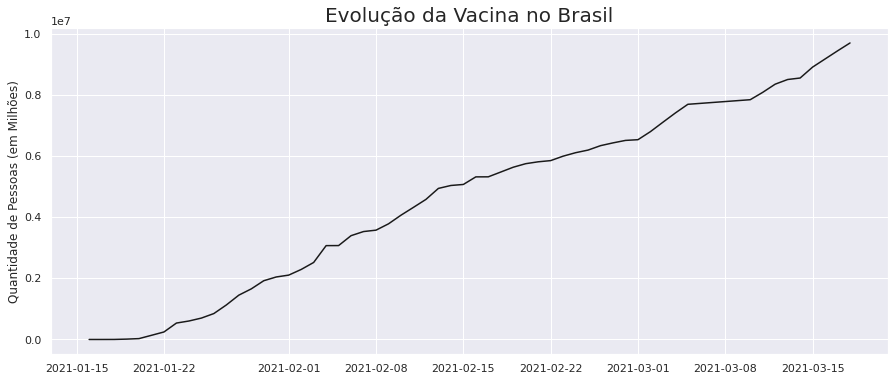

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(temp.index,temp.people_vaccinated,'k')
plt.title("Evolução da Vacina no Brasil",fontsize=20)
plt.ylabel("Quantidade de Pessoas (em Milhões)")

#plt.plot(new_index,modelo_previsto,'r')

##Evolução da Vacina em outros Países

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [314]:
vac_world = df[['location','date','people_vaccinated']]

In [315]:
vac_world

,location,date,people_vaccinated
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
75802,Zimbabwe,2021-03-14,36359.0
75803,Zimbabwe,2021-03-15,37660.0
75804,Zimbabwe,2021-03-16,39550.0
75805,Zimbabwe,2021-03-17,39607.0


In [316]:
vac_world = vac_world.groupby('date').sum()

In [317]:
vac_world = vac_world.loc[(vac_world!=0).any(1)]

In [ ]:
vac_world.shape[0]

96

Text(0, 0.5, 'Quantidade de Pessoas (em dezenas de Milhões)')

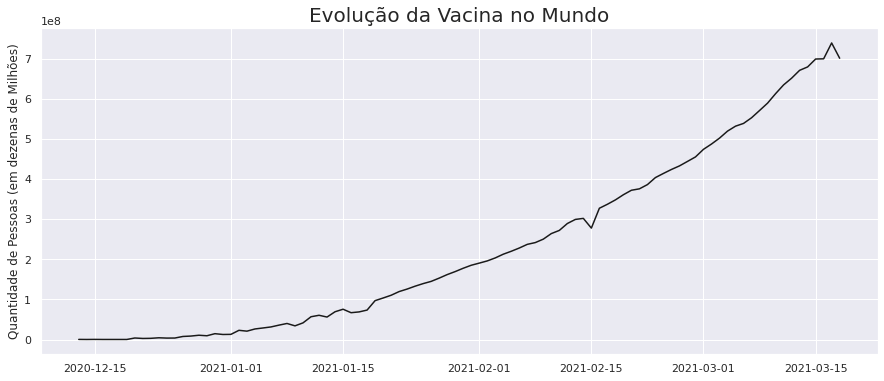

In [318]:
fig = plt.figure(figsize=(15,6))
plt.plot(vac_world,'k')
plt.title("Evolução da Vacina no Mundo",fontsize=20)
plt.ylabel("Quantidade de Pessoas (em dezenas de Milhões)")

In [ ]:
vac_world = df[['location','date','people_vaccinated']]
vac_world.head()

,location,date,people_vaccinated
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN


In [ ]:
vac_world.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vac_world.set_index("location",inplace=True)

In [ ]:
vac_world.drop(["World","Asia","Europe","North America","South America","European Union"],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
temp_1 = vac_world.groupby('location').sum().sort_values(by="people_vaccinated",ascending=False)
temp_1 = temp_1.head(8).reset_index()
temp_1

,location,people_vaccinated
0,United States,2.471594e+09
1,United Kingdom,9.385852e+08
2,India,6.257846e+08
3,Israel,2.730314e+08
4,Brazil,2.486109e+08
5,Turkey,2.258481e+08
6,Germany,2.121772e+08
7,Italy,1.574074e+08


Text(0.5, 1.0, 'Quantidade pessoas Vacinadas por País (Top 8)')

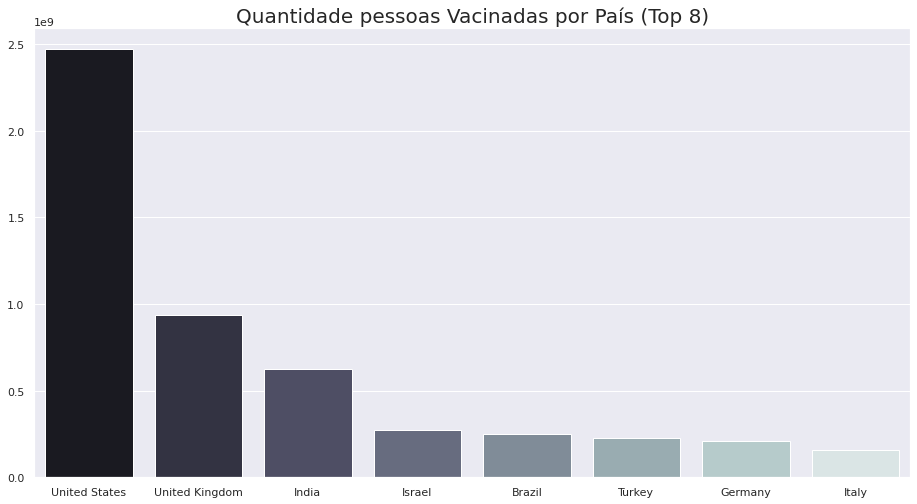

In [319]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.barplot(x="location", y="people_vaccinated", data=temp_1,palette="bone")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Quantidade pessoas Vacinadas por País (Top 8)',fontsize=20)

### Plotando os gráficos de evolução dos 6 melhores

In [ ]:
vac_world = df[['location','date','people_vaccinated']]
vac_world.head()

,location,date,people_vaccinated
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN


In [ ]:
top_vac = temp_1.location

In [ ]:
top_vac = top_vac.to_list()

In [ ]:
vac_world.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
usa_vac = vac_world.query("location == 'United States'").set_index('date').drop(labels='location',axis=1)
uk_vac = vac_world.query("location == 'United Kingdom'").set_index('date').drop(labels='location',axis=1)
ind_vac = vac_world.query("location == 'India'").set_index('date').drop(labels='location',axis=1)
isr_vac = vac_world.query("location == 'Israel'").set_index('date').drop(labels='location',axis=1)
tur_vac = vac_world.query("location == 'Turkey'").set_index('date').drop(labels='location',axis=1)
ger_vac = vac_world.query("location == 'Germany'").set_index('date').drop(labels='location',axis=1)

Text(0.5, 1.0, 'Alemanha')

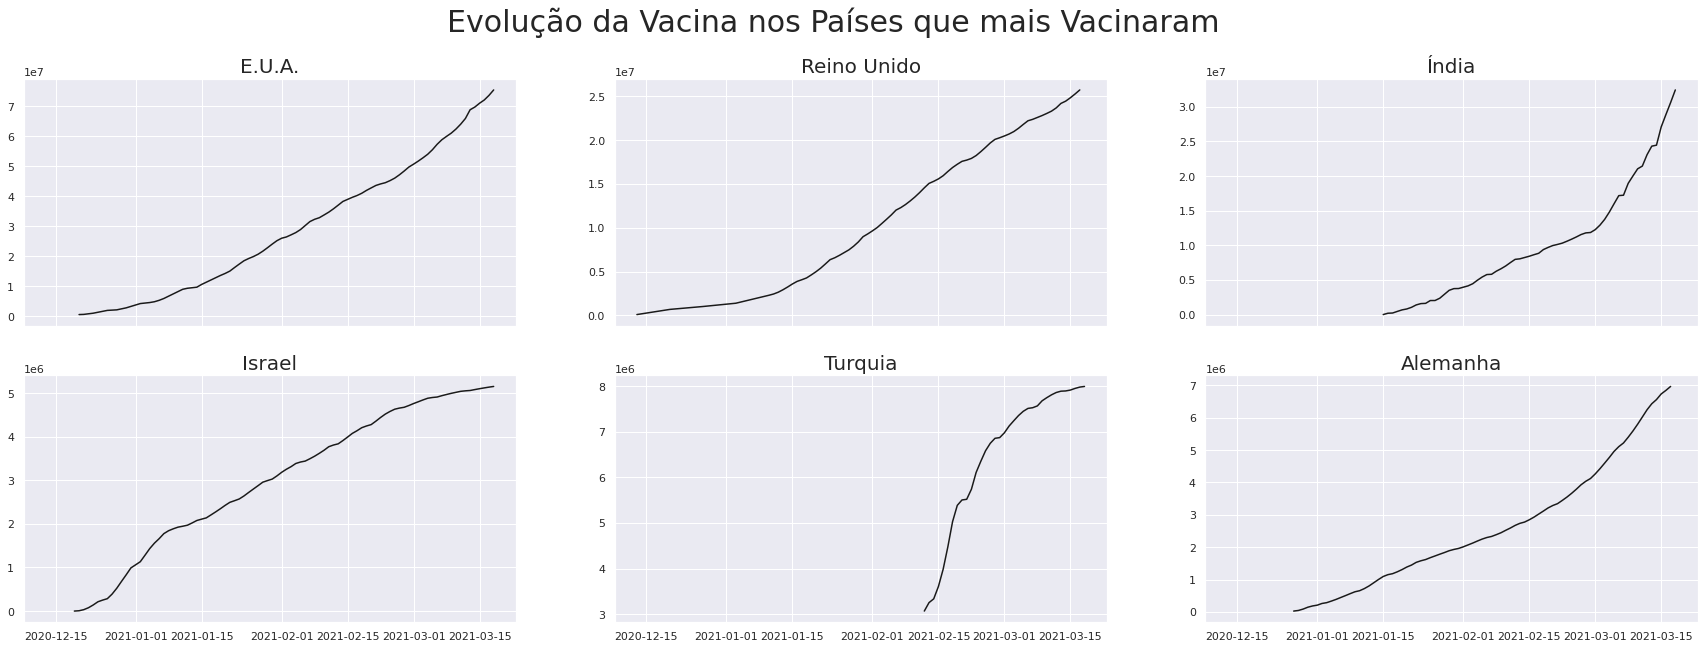

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharex=True)

fig.set_size_inches((30,10))
fig.suptitle('Evolução da Vacina nos Países que mais Vacinaram',fontsize=30)

axs[0,0].plot(usa_vac.index,usa_vac.people_vaccinated,'k')
axs[0,1].plot(uk_vac.index,uk_vac.people_vaccinated,'k')
axs[0,2].plot(ind_vac.index,ind_vac.people_vaccinated,'k')

axs[1,0].plot(isr_vac.index,isr_vac.people_vaccinated,'k')
axs[1,1].plot(tur_vac.index,tur_vac.people_vaccinated,'k')
axs[1,2].plot(ger_vac.index,ger_vac.people_vaccinated,'k')

axs[0, 0].set_title('E.U.A.',{'fontsize': 20})
axs[0, 1].set_title('Reino Unido',{'fontsize': 20})
axs[0, 2].set_title('Índia',{'fontsize': 20})
axs[1, 0].set_title('Israel',{'fontsize': 20})
axs[1, 1].set_title('Turquia',{'fontsize': 20})
axs[1, 2].set_title('Alemanha',{'fontsize': 20})


#Médias Móveis

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


## Casos Diários

In [ ]:
world_cases = df[['date','location','new_cases']]

In [ ]:
world_cases_2 = world_cases.groupby("date").sum()

In [ ]:
casos_brasil = world_cases.query("location=='Brazil'")

In [ ]:
media_movel_brasil = casos_brasil.new_cases.rolling(14).mean()
media_movel_mundo = world_cases_2.new_cases.rolling(14).mean()

Text(0.5, 1.0, 'Novos Casos Diários no Brasil')

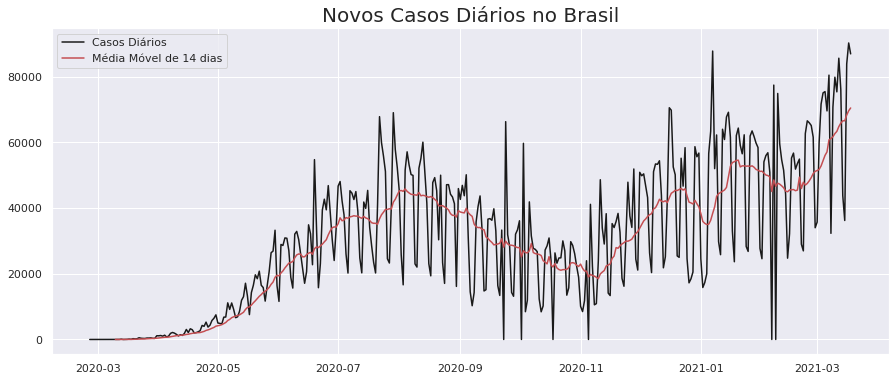

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(casos_brasil.date,casos_brasil.new_cases,'k',label="Casos Diários")
plt.plot(casos_brasil.date,media_movel_brasil,'r',label="Média Móvel de 14 dias")
plt.legend()
plt.title("Novos Casos Diários no Brasil",fontsize=20)

In [ ]:
world_cases_2.shape[0]

444

Text(0.5, 1.0, 'Novos Casos Diários no Mundo')

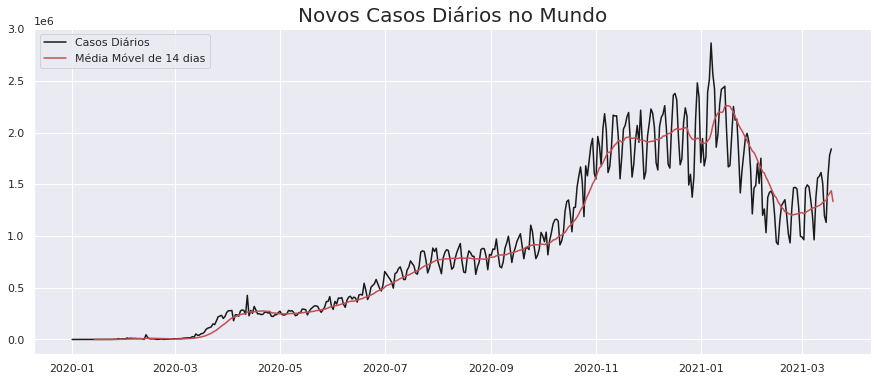

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(world_cases_2.index[:443],world_cases_2.new_cases[:443],'k',label="Casos Diários")
plt.plot(world_cases_2.index,media_movel_mundo,'r',label="Média Móvel de 14 dias")
plt.legend()
plt.title("Novos Casos Diários no Mundo",fontsize=20)

In [ ]:
casos_brasil_2 = casos_brasil[['date','new_cases']].set_index('date')

In [ ]:
world_cases_2_n = world_cases_2/7800000000
casos_brasil_n = casos_brasil_2/211000000

In [ ]:
media_movel_brasil_n = casos_brasil_n.new_cases.rolling(14).mean()
media_movel_mundo_n = world_cases_2_n.new_cases.rolling(14).mean()

In [ ]:
media_movel_brasil_n

date
2020-02-26         NaN
2020-02-27         NaN
2020-02-28         NaN
2020-02-29         NaN
2020-03-01         NaN
                ...   
2021-03-14    0.000316
2021-03-15    0.000316
2021-03-16    0.000324
2021-03-17    0.000330
2021-03-18    0.000334
Name: new_cases, Length: 387, dtype: float64

Text(0.5, 1.0, 'Novos Casos Diários no Mundo per Capita')

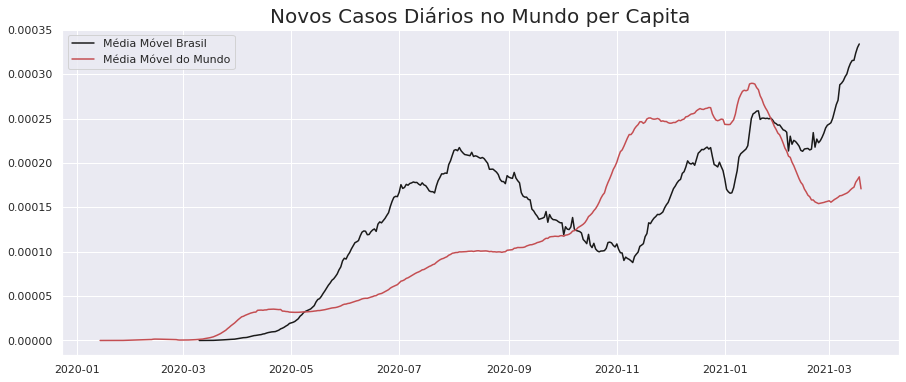

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(media_movel_brasil_n.index,media_movel_brasil_n,'k',label="Média Móvel Brasil")
plt.plot(world_cases_2_n.index,media_movel_mundo_n,'r',label="Média Móvel do Mundo")
plt.legend()
plt.title("Novos Casos Diários no Mundo per Capita",fontsize=20)